In [26]:
import pandas as pd
import numpy as np
import statistics as st

In [2]:
df = pd.read_csv('cartier_catalog.csv')

In [4]:
df.columns

Index(['ref', 'categorie', 'title', 'price', 'tags', 'description', 'image'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ref          692 non-null    object 
 1   categorie    692 non-null    object 
 2   title        692 non-null    object 
 3   price        692 non-null    float64
 4   tags         692 non-null    object 
 5   description  692 non-null    object 
 6   image        692 non-null    object 
dtypes: float64(1), object(6)
memory usage: 38.0+ KB


In [6]:
df.head()

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png


In [9]:
df.describe()

,price
count,692.000000
mean,27057.167630
std,54549.444975
min,500.000000
25%,2620.000000
50%,6800.000000
75%,22225.000000
max,370000.000000


In [10]:
df.skew()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9200\1665899112.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew()


price    3.489146
dtype: float64

# DATA CLEANING

In [11]:
df.duplicated().sum()

0

In [12]:
df.isna().sum()

ref            0
categorie      0
title          0
price          0
tags           0
description    0
image          0
dtype: int64

<Axes: >

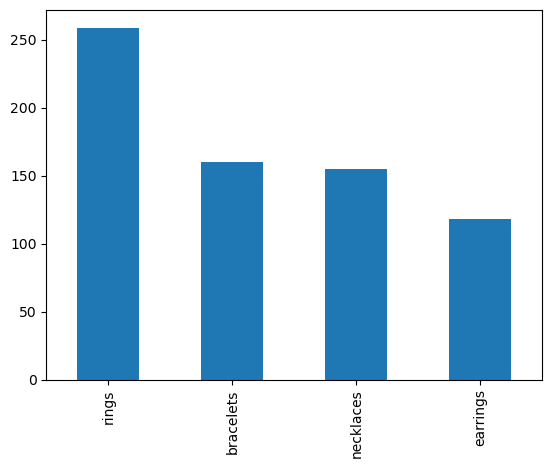

In [27]:
df.categorie.value_counts().plot(kind = 'bar')

In [5]:
df.tags.value_counts().head()

white gold, diamonds     121
pink gold, diamonds      100
yellow gold, diamonds     60
yellow gold               45
pink gold                 38
Name: tags, dtype: int64

In [6]:
df.columns

Index(['ref', 'categorie', 'title', 'price', 'tags', 'description', 'image'], dtype='object')

In [4]:
pd.set_option('display.max_rows',500000)

In [50]:
df

,ref,categorie,title,price,tags,description,image
0,B4084600,rings,Love ring,1650.0,yellow gold,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png
1,B4084900,rings,Love ring,3650.0,platinum,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png
2,B4084800,rings,Love ring,1650.0,pink gold,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png
3,B4084700,rings,Love ring,1770.0,white gold,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png
4,B4085000,rings,Love wedding band,1070.0,yellow gold,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png
5,B4085200,rings,Love wedding band,1070.0,pink gold,"Love wedding band, 18K rose gold. Width: 3.6mm.",/content/dam/rcq/car/58/73/14/587314.png
6,B4085100,rings,Love wedding band,1140.0,white gold,"Love wedding band, 18K white gold. Width: 3.6mm.",/content/dam/rcq/car/59/22/21/592221.png
7,B4085300,rings,Love wedding band,2380.0,platinum,"Love wedding band, 950/1000 platinum. Width: 3...",/content/dam/rcq/car/62/40/10/624010.png
8,B4032400,rings,"Love ring, 3 diamonds",3500.0,"yellow gold, diamonds","Love ring, 18K yellow gold, set with 3 brillia...",/content/dam/rcq/car/58/47/16/584716.png
9,B4087500,rings,"Love ring, 3 diamonds",3500.0,"pink gold, diamonds","Love ring, 18K rose gold, set with 3 brilliant...",/content/dam/rcq/car/58/39/70/583970.png


In [35]:
df_fix = df.set_index(['ref', 'categorie', 'title', 'price', 'description', 'image']).apply(lambda x: x.str.split(',').explode().str.strip()).reset_index()

In [51]:
df.loc[df.ref == '\xa0B4032400']

,ref,categorie,title,price,tags,description,image
8,B4032400,rings,"Love ring, 3 diamonds",3500.0,"yellow gold, diamonds","Love ring, 18K yellow gold, set with 3 brillia...",/content/dam/rcq/car/58/47/16/584716.png


In [26]:
df['ref']=df.ref.str[1:]

In [44]:
df.description.str.split(',').str.get(7).str.strip()

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
5                                                    NaN
6                                                    NaN
7                                                    NaN
8                                                    NaN
9                                                    NaN
10                                                   NaN
11                                                   NaN
12                                                   NaN
13                                                   NaN
14                                                   NaN
15                                                   NaN
16                                                   NaN
17                             

In [47]:
df.description.loc[df.description.map(len)>200]

207    Large model Reflection de Cartier ring, 18K wh...
258    Clash de Cartier ring, XL model, 18K yellow go...
369    Large model Reflection de Cartier bracelet, 18...
486    Les Oiseaux Libérés necklace, 18K pink gold, g...
664    Reflection de Cartier earring, large model, 18...
665    Reflection de Cartier earring, large model, 18...
691    Clash de Cartier earrings, XL model, 18K yello...
Name: description, dtype: object

In [29]:
df_fix.head()

,ref,categorie,title,price,description,image,tags
0,B4084600,rings,Love ring,1650.0,"Love ring, 18K yellow gold. Width: 5.5mm.",/content/dam/rcq/car/58/71/74/587174.png,yellow gold
1,B4084900,rings,Love ring,3650.0,"Love ring, 950/1000 platinum. Width: 5.5mm.",/content/dam/rcq/car/19/43/98/1/1943981.png,platinum
2,B4084800,rings,Love ring,1650.0,"Love ring, 18K rose gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/64/0/1028640.png,pink gold
3,B4084700,rings,Love ring,1770.0,"Love ring, 18K white gold. Width: 5.5mm.",/content/dam/rcq/car/10/28/63/6/1028636.png,white gold
4,B4085000,rings,Love wedding band,1070.0,"Love wedding band, 18K yellow gold. Width: 3.6mm.",/content/dam/rcq/car/59/18/04/591804.png,yellow gold


In [49]:
df_fix.tags = [x if x[-1] == 's' else x+'s' for x in df_fix['tags']]

In [50]:
df_fix['tags'].value_counts()

diamonds                       494
white golds                    275
pink golds                     239
yellow golds                   205
onyxs                           90
emeralds                        70
platinums                       51
tsavorite garnets               43
sapphires                       21
ceramics                        17
lacquers                        11
mother-of-pearls                 9
black lacquers                   8
white mother-of-pearls           7
lapis lazulis                    5
chrysoprases                     5
pink sapphires                   4
spinels                          4
carnelians                       4
amazonites                       3
amethysts                        3
malachites                       3
aventurines                      2
garnets                          2
rubies                           2
diamonds.s                       2
pearls                           2
corals                           2
non-rhodiumized whit

In [71]:
df_fix.groupby(['categorie','tags']).agg(avg_price = ('price','mean')).reset_index()

,categorie,tags,avg_price
0,bracelets,amazonites,56000.000000
1,bracelets,amethysts,8000.000000
2,bracelets,aquamarines,8250.000000
3,bracelets,black lacquers,35000.000000
4,bracelets,carnelians,217000.000000
5,bracelets,ceramics,13258.000000
6,bracelets,chrysoprases,142750.000000
7,bracelets,diamonds,60372.777778
8,bracelets,emeralds,163400.000000
9,bracelets,garnets,7750.000000


In [72]:
df_fix.groupby(['tags']).agg(avg_price=('price','mean')).sort_values('avg_price', ascending = False).reset_index()

,tags,avg_price
0,rubies,257000.000000
1,obsidians,234000.000000
2,yellow diamonds,200000.000000
3,orange diamonds,200000.000000
4,brown diamonds,200000.000000
5,spessartite garnets,200000.000000
6,gray mother-of-pearls,194000.000000
7,mother-of-pearls,183222.222222
8,chrysoprases,118192.000000
9,emeralds,111485.000000


In [67]:
df_fix.groupby(['categorie']).agg(counts=('tags','nunique')).sort_values(by = 'counts',ascending= False)

,counts
categorie,
necklaces,29
bracelets,24
rings,24
earrings,22


In [64]:
df_fix.columns

Index(['ref', 'categorie', 'title', 'price', 'description', 'image', 'tags'], dtype='object')